Subquestion 1: Which types of public transport have been affected most from the COVID pandemic? Are there larger changes in certain types of transport than others?


In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt

filename_part = "Mobility_trend__per_stage__travel_modes_06102025_113641.csv"
#looking for the file starting from the notebook
start_dir = os.getcwd()

found_path = None

#Because the file could not be found on every laptop, we created a forloop that searches for the specific title on each seperate map, 
#When found, it returns the correct file needed. 

for root, dirs, files in os.walk(start_dir):
    for file in files:
        if filename_part in file:
            found_path = os.path.join(root, file)
            break
    if found_path:
        break

# CSV reading
df = pd.read_csv(found_path, sep=";", encoding="utf-8", header=0)


print(df.head())

print(df.columns.tolist())

                     Sex             Age Modes of travel  \
0  Total male and female  18 to 24 years           Total   
1  Total male and female  18 to 24 years           Total   
2  Total male and female  18 to 24 years           Total   
3  Total male and female  18 to 24 years           Total   
4  Total male and female  18 to 24 years           Total   

                             Travel motives Margins Periods  \
0  Travel to/from work, (non)-daily commute   Value   2014*   
1  Travel to/from work, (non)-daily commute   Value   2015*   
2  Travel to/from work, (non)-daily commute   Value   2016*   
3  Travel to/from work, (non)-daily commute   Value   2017*   
4  Travel to/from work, (non)-daily commute   Value   2018*   

  Stages per person per day (average) (number)  \
0                                         0.82   
1                                         0.79   
2                                         0.79   
3                                         0.80   
4         

In [50]:
df_motive = df[df["Travel motives"]=="Travel to/from work, (non)-daily commute"]
print(df_motive.head())


                     Sex             Age Modes of travel  \
0  Total male and female  18 to 24 years           Total   
1  Total male and female  18 to 24 years           Total   
2  Total male and female  18 to 24 years           Total   
3  Total male and female  18 to 24 years           Total   
4  Total male and female  18 to 24 years           Total   

                             Travel motives Margins Periods  \
0  Travel to/from work, (non)-daily commute   Value   2014*   
1  Travel to/from work, (non)-daily commute   Value   2015*   
2  Travel to/from work, (non)-daily commute   Value   2016*   
3  Travel to/from work, (non)-daily commute   Value   2017*   
4  Travel to/from work, (non)-daily commute   Value   2018*   

  Stages per person per day (average) (number)  \
0                                         0.82   
1                                         0.79   
2                                         0.79   
3                                         0.80   
4         

Stages per person per day (average) (number)                     float64
Distance travelled per stage (average) (passenger kilometres)    float64
Population                                                       float64
dtype: object
   Stages per person per day (average) (number)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                          0.05   

   Distance travelled per stage (average) (passenger kilometres)  Population  
0                                                NaN              16829289.0  
1                                                NaN              16900726.0  
2                                                NaN              16979120.0  
3                                                NaN              17081507.0  
4                                              0.776             

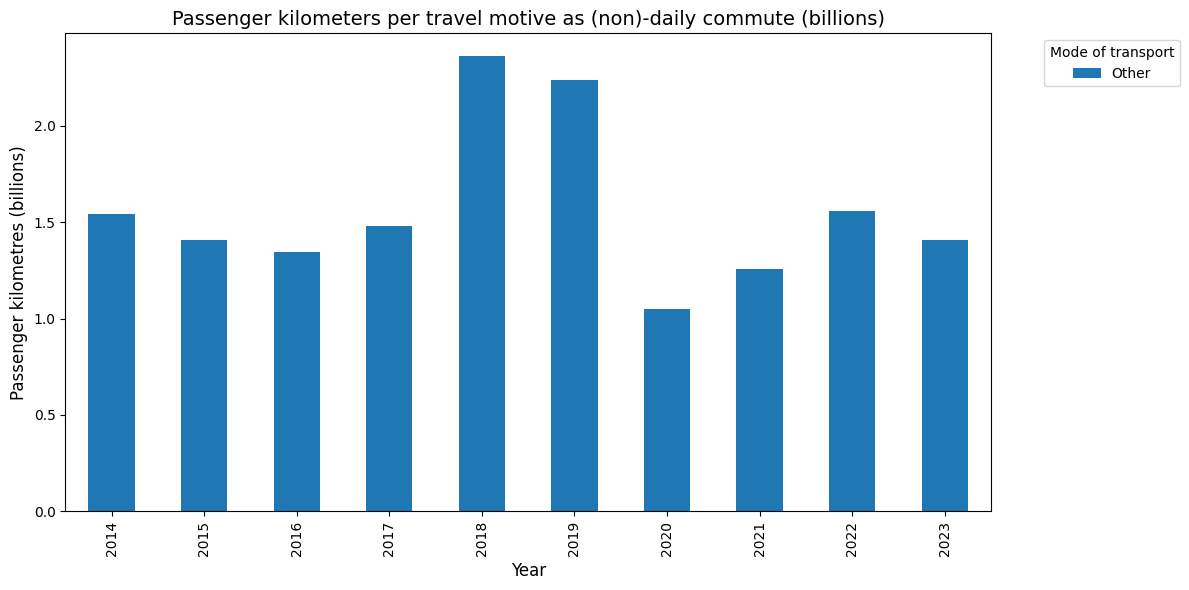

In [56]:
#staven
#dataframe alleen filteren voor werkverkeer. per mode of travel, per jaar, aantal kilometers

#df_motive = df_motive.iloc[:, [3, 6, 8]]
days_per_year = 365


pop = pd.read_csv("bontwikkeling.csv", sep=';', skiprows=4)  # Read population data
pop.columns = ["Year", "Population"]  # Set column names
pop = pop[pop["Year"].str.match(r"^\d{4}$", na=False)]  # Filter rows with valid year format
pop["Year"] = pop["Year"].astype(int)  # Convert 'Year' to integer
pop["Population"] = pd.to_numeric(pop["Population"], errors="coerce")  # Convert 'Population' to numeric


df["Periods"] = (df["Periods"].astype(str).str.replace("*", "", regex=False).str.strip())
df["Periods"] = pd.to_numeric(df["Periods"], errors="coerce")

df["Periods"] = df["Periods"].astype(int)

df["Stages per person per day (average) (number)"] = pd.to_numeric(
    df["Stages per person per day (average) (number)"], errors="coerce"
)

df["Distance travelled per stage (average) (passenger kilometres)"] = pd.to_numeric(
    df["Distance travelled per stage (average) (passenger kilometres)"], errors="coerce"
)

#multiply distance and stages

df["Distance travelled per stage (average) (passenger kilometres)"] = (
    df["Stages per person per day (average) (number)"]
    * df["Distance travelled per stage (average) (passenger kilometres)"]
)

df = df[df["Modes of travel"].isin(["Other"])]
df = df[df["Travel motives"] == "Travel to/from work, (non)-daily commute"]
df = df[df["Periods"].between(2014, 2024)]


merged = pd.merge(df, pop, left_on="Periods", right_on="Year", how="left")


#Convert everything to numeric
cols_to_num = [
    "Stages per person per day (average) (number)",
    "Distance travelled per stage (average) (passenger kilometres)",
    "Population"
]

for col in cols_to_num:
    merged[col] = pd.to_numeric(merged[col], errors="coerce")

print(merged[cols_to_num].dtypes)
print(merged[cols_to_num].head())
# Calculate total passenger kilometres annually
merged["Total passenger kilometres (annual)"] = (
    merged["Stages per person per day (average) (number)"] *
    merged["Distance travelled per stage (average) (passenger kilometres)"] *
    merged["Population"] *
    days_per_year
)


merged["Total passenger kilometres (annual, billions)"] = (
    merged["Total passenger kilometres (annual)"] / 1000000000
)

# Convert distance and stage column to numeric

pivot_df = merged.pivot_table(
    index="Periods",
    columns="Modes of travel",
    values="Total passenger kilometres (annual, billions)",
    aggfunc="sum"
)

plt.figure(figsize=(12, 6))
pivot_df.plot(kind="bar", stacked=True, ax=plt.gca())
plt.title("Passenger kilometers per travel motive as (non)-daily commute (billions)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Passenger kilometres (billions)", fontsize=12)
plt.legend(title="Mode of transport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




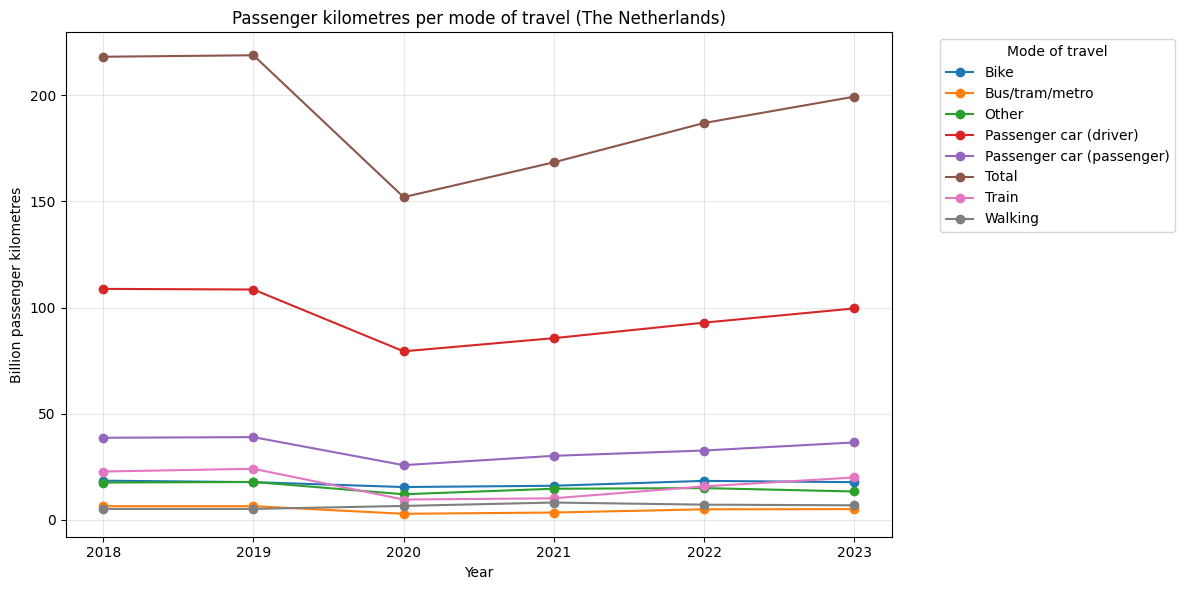

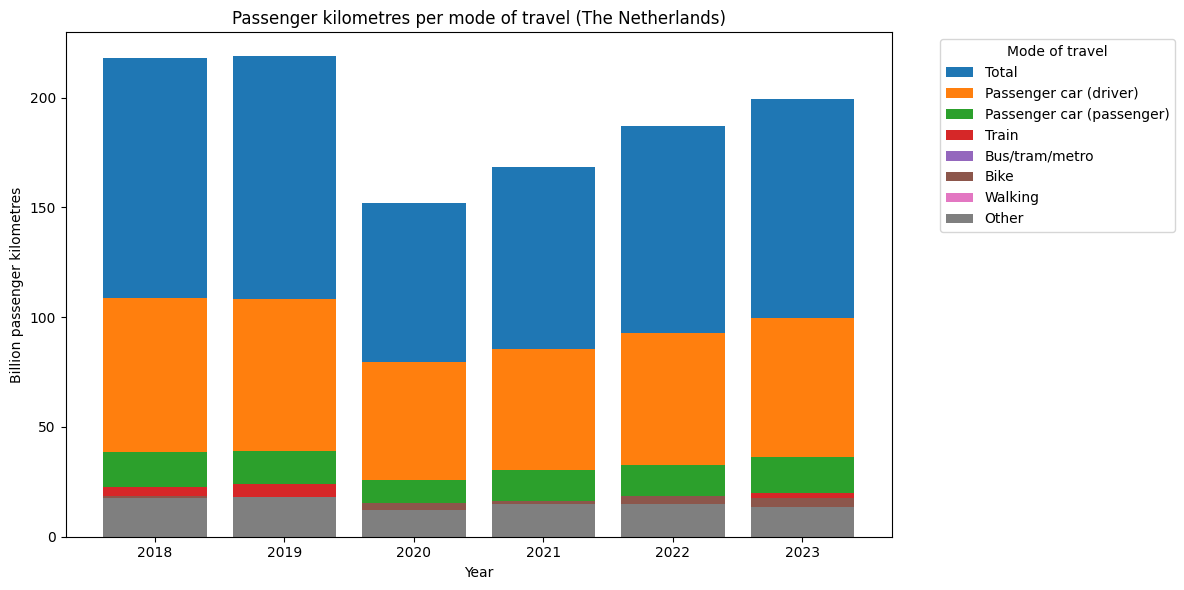

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df_1 = df_1.dropna(how='all').dropna(axis=1, how='all')

first_col = df_1.columns[0]

#The netherlands filteren
df_1 = df_1[df_1[first_col].astype(str).str.strip().str.lower() == "the netherlands"]
if df_1.empty:
    raise ValueError("Geen rijen gevonden met 'The Netherlands' — controleer de spelling of hoofdletters.")

#index resetten
df_1 = df_1.reset_index(drop=True)

#Mapping each year
year_map = {None: 2018}
base_year = 2018
mapped_cols = {}

for c in df_1.columns:
    match = re.search(r"\.(\d+)$", c)
    if match:
        mapped_cols[c] = base_year + int(match.group(1))
    elif c != first_col:
        mapped_cols[c] = base_year  # Default year if no suffix
    else:
        mapped_cols[c] = c  # 'Modes of travel'


long_df = df_1.melt(id_vars=[first_col], var_name="Mode_raw", value_name="Passenger_km_billion")
long_df["Periods"] = long_df["Mode_raw"].map(mapped_cols)


long_df["Modes of travel"] = long_df["Mode_raw"].str.replace(r"\.\d+$", "", regex=True)

#value cleanse
long_df["Passenger_km_billion"] = (
    long_df["Passenger_km_billion"]
    .astype(str)
    .str.replace(",", ".")
    .str.extract(r"([\d\.]+)")[0]
)
long_df["Passenger_km_billion"] = pd.to_numeric(long_df["Passenger_km_billion"], errors="coerce")
long_df = long_df.dropna(subset=["Passenger_km_billion"])

#plotting
plt.figure(figsize=(12, 6))
for mode in sorted(long_df["Modes of travel"].unique()):
    subset = long_df[long_df["Modes of travel"] == mode]
    plt.plot(subset["Periods"], subset["Passenger_km_billion"], marker="o", label=mode)

plt.title("Passenger kilometres per mode of travel (The Netherlands)")
plt.xlabel("Year")
plt.ylabel("Billion passenger kilometres")
plt.legend(title="Mode of travel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for mode in long_df["Modes of travel"].unique():
    subset = long_df[long_df["Modes of travel"] == mode]
    plt.bar(subset["Periods"], subset["Passenger_km_billion"], label=mode)

plt.title("Passenger kilometres per mode of travel (The Netherlands)")
plt.xlabel("Year")
plt.ylabel("Billion passenger kilometres")
plt.legend(title="Mode of travel", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(sorted(long_df["Periods"].unique()))
plt.tight_layout()
plt.show()


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

csv_path = "/Users/bentedegen/Desktop/tilprogramming/groep24/Subquestion 1/Mobility_trend__per_stage__travel_modes_06102025_113641_1.csv"

df = pd.read_csv(csv_path, encoding="utf-8-sig")

df_clean = df.dropna()

display(df_clean.head())


,Sex,Age,Modes of travel,Travel motives,Periods,Stages per person per day (average) (number),Distance travelled per stage (average) (passenger kilometres),Average travel time per stage (Minutes)
0,Total male and female,18 to 24 years,Total,"Travel to/from work, (non)-daily commute",2014,0.82,12.21,21.99
1,Total male and female,18 to 24 years,Total,"Travel to/from work, (non)-daily commute",2015,0.79,12.23,21.87
2,Total male and female,18 to 24 years,Total,"Travel to/from work, (non)-daily commute",2016,0.79,12.15,21.95
3,Total male and female,18 to 24 years,Total,"Travel to/from work, (non)-daily commute",2017,0.80,12.23,22.15
4,Total male and female,18 to 24 years,Total,"Travel to/from work, (non)-daily commute",2018,0.82,12.17,21.89


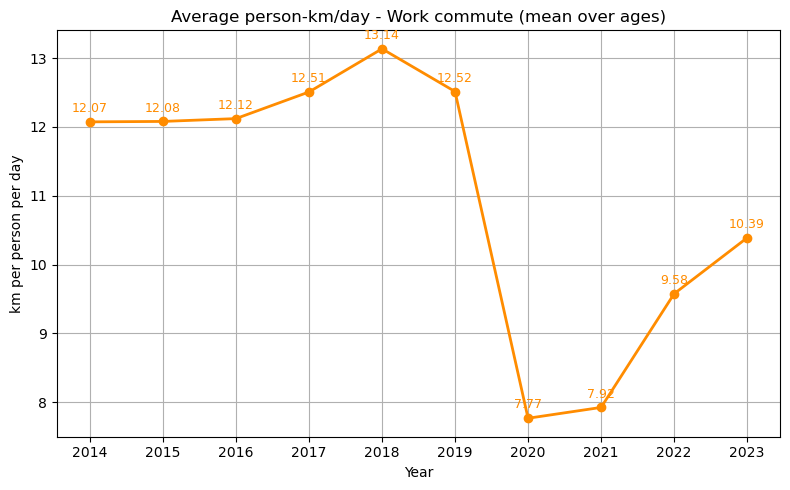

In [5]:
# Naming columns
stages_col = "Stages per person per day (average) (number)"
dist_col   = "Distance travelled per stage (average) (passenger kilometres)"

# Strings -> numeric
def to_num(s):
    return (s.astype(str)
             .str.replace("\u202f", "", regex=False)  # narrow no-break space
             .str.replace("\xa0",  "", regex=False)   # no-break space
             .str.replace(" ",     "", regex=False)
             .str.replace(",",     ".", regex=False)  # , -> .
             .pipe(pd.to_numeric, errors="coerce"))

df_clean[stages_col] = to_num(df_clean[stages_col])
df_clean[dist_col]   = to_num(df_clean[dist_col])


# Filter motive and totals
motive = "Travel to/from work, (non)-daily commute"
mask = (
    (df_clean["Travel motives"] == motive) &
    (df_clean["Sex"] == "Total male and female") &
    (df_clean["Modes of travel"] == "Total")
)
df_work = df_clean[mask].copy()

#Kilometers per day per person
df_work["person_km_per_day"] = df_work[stages_col] * df_work[dist_col]

#Average of all age groups per year 
df_avg = (
    df_work.groupby("Periods", as_index=False)["person_km_per_day"]
    .mean()
    .rename(columns={"person_km_per_day": "avg_person_km_per_day"})
)

#Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df_avg["Periods"], df_avg["avg_person_km_per_day"],
         marker="o", color="darkorange", linewidth=2)

plt.title("Average person-km/day - Work commute (mean over ages)")
plt.xlabel("Year")
plt.ylabel("km per person per day")
plt.grid(True)
plt.xticks(df_avg["Periods"])

# Show exact value 
for x, y in zip(df_avg["Periods"], df_avg["avg_person_km_per_day"]):
    plt.text(x, y + 0.1, f"{y:.2f}", ha="center", va="bottom",
             fontsize=9, color="darkorange")

plt.tight_layout()
plt.show()


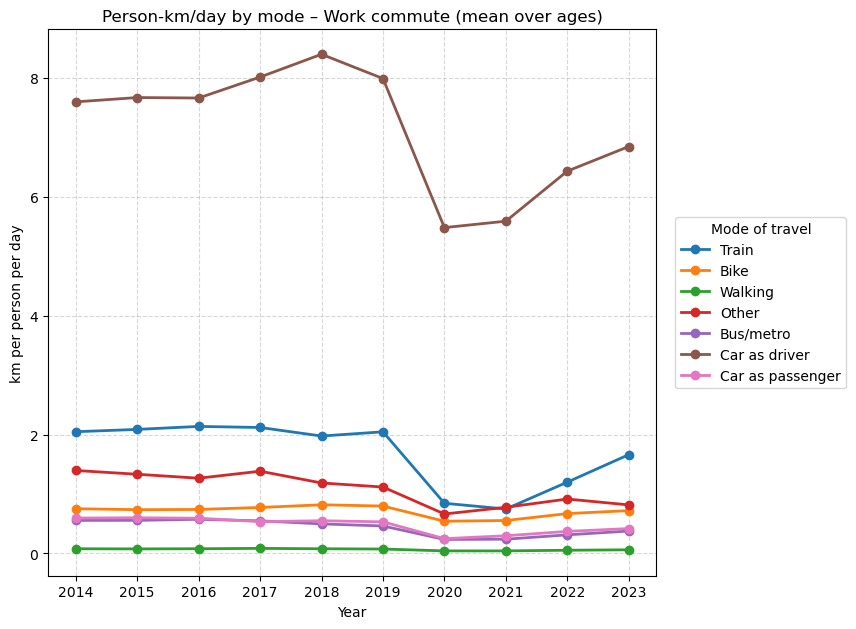

In [6]:
# Work-commute by transport mode over the years

# Filter for the desired travel motive and total gender category
# (we keep all transport modes except the overall 'Total' row)
motive = "Travel to/from work, (non)-daily commute"
df_modes = df_clean[
    (df_clean["Travel motives"] == motive) &
    (df_clean["Sex"] == "Total male and female")
].copy()

# 2) Calculate total person-kilometres per day
df_modes["person_km_per_day"] = df_modes[stages_col] * df_modes[dist_col]

# 3) Compute the average across all age groups per year and per transport mode
agg = (
    df_modes
    .groupby(["Periods", "Modes of travel"], as_index=False)["person_km_per_day"]
    .mean()
)

# 4) Remove the 'Total' transport mode (we only want the individual modes)
agg = agg[agg["Modes of travel"] != "Total"].copy()

# 5) Pivot the table: rows = years, columns = transport modes, values = avg km/person/day
pivot = (
    agg.pivot(index="Periods", columns="Modes of travel", values="person_km_per_day")
    .sort_index()
)

# Reorder columns to make the legend/order of lines more logical
order = [
    "Passenger car (driver)",
    "Passenger car (passenger)",
    "Train",
    "Bus/tram/metro",
    "Bike",
    "Walking",
    "Other",
]
cols = [c for c in order if c in pivot.columns] + [c for c in pivot.columns if c not in order]
pivot = pivot[cols]

# 6) Plot the trends over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot one line per transport mode
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], marker="o", linewidth=2, label=col)

# Legend: positioned outside the plot area, aligned on the right
plt.legend(
    title="Mode of travel",
    bbox_to_anchor=(1.02, 0.5),  # position: slightly outside the right border
    loc="center left",           # align legend box to the left of the anchor
    ncol=1,                      # single column legend
    frameon=True
)

# Adjust layout to make space for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Titles, labels, and style
plt.title("Person-km/day by mode – Work commute (mean over ages)")
plt.xlabel("Year")
plt.ylabel("km per person per day")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(pivot.index)  # ensure all years are shown on the x-axis

plt.show()

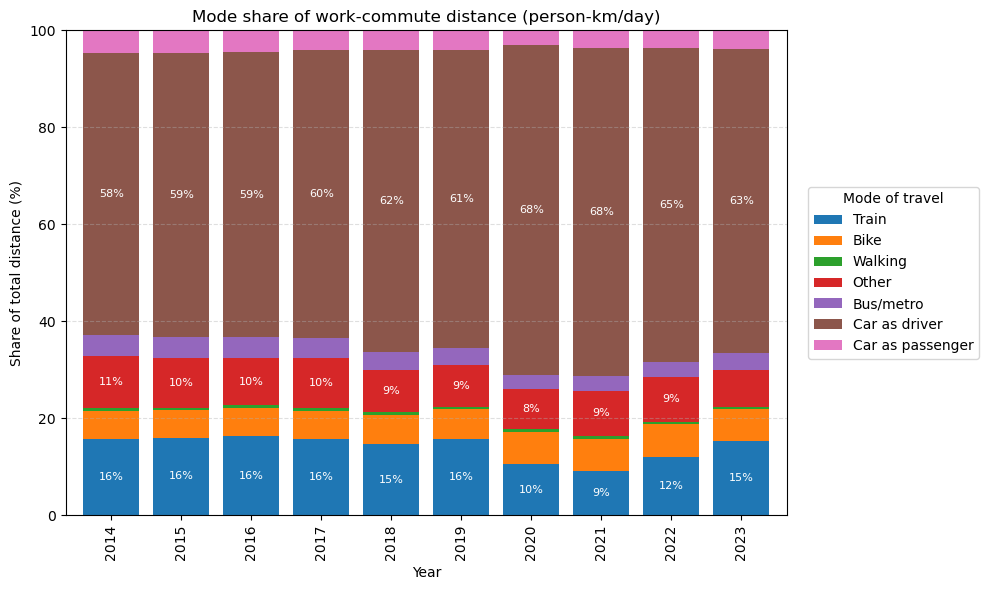

In [7]:
# 100% stacked bar: share per transport mode (work commute)
# Using 'pivot' from the previous cell (rows = years, columns = modes, values = km/person/day)

# Convert absolute values to yearly shares (percentages)
totals = pivot.sum(axis=1)
share = pivot.div(totals, axis=0) * 100  # convert to percentage of total per year

# Plot 100% stacked bars
ax = share.plot(kind="bar", stacked=True, figsize=(10, 6), width=0.8)

# Titles, labels, and style
ax.set_title("Mode share of work-commute distance (person-km/day)")
ax.set_xlabel("Year")
ax.set_ylabel("Share of total distance (%)")
ax.set_ylim(0, 100)
ax.grid(True, axis="y", linestyle="--", alpha=0.4)

# Place legend outside the plot, aligned to the right
ax.legend(
    title="Mode of travel",
    bbox_to_anchor=(1.02, 0.5),  # position: slightly outside the right edge
    loc="center left",           # align legend box to the left of the anchor
    ncol=1,                      # single column
    frameon=True
)

# Add percentage labels on segments larger than 8%
for p in ax.patches:
    h = p.get_height()
    if h >= 8:  # only label segments that are visually large enough
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + h / 2
        ax.text(x, y, f"{h:.0f}%", ha="center", va="center", fontsize=8, color="white")

# Adjust layout to fit legend and axis labels nicely
plt.tight_layout()
plt.show()